In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
df_inventario = pd.read_excel('../../shapes_diversos/vias_munich/inventario_vitoria.xlsx',
                               header=[0,1])

In [3]:
df_inventario.tail()

Cidade                  Nome da Via         FA - Chuva  \
    Unnamed: 0_level_1          Unnamed: 1_level_1 Unnamed: 2_level_1   
106            Vitória         Rua Constante Sodré           0.953836   
107            Vitória   Rua Aterro da Comdusa (1)           0.953836   
108            Vitória   Rua Aterro da Comdusa (2)           0.953836   
109            Vitória              Terceira Ponte           0.953836   
110            Vitória  Vias Secundárias - Vitória           0.953836   

       DMT [km/h]                           Peso Médio Veículos [t]  \
            Leves         Moto      Pesados      Unnamed: 6_level_1   
106    231.655862    61.423903    10.529812                1.689595   
107   1106.225580   225.480664   124.574953                2.471172   
108    616.290792   157.376401    97.309072                2.810621   
109   9798.675545  1035.079292   225.819237                1.622953   
110  25980.881867  9888.143950  2670.439718                2.113218   

         Classificação  Teor Silte [g/m²] Ressuspensão de Partículas  (kg/h])  \
    Unnamed: 7_level_1 Unnamed: 8_level_1                                 PM    
106          Collector           1.936689                            2.914435   
107            Freeway           0.256175                            3.269274   
108            Highway           0.610497                            4.913972   
109            Freeway           0.256175                           16.169459   
110              Local           1.936689                          464.782181   

     ... Desgaste de Pneus e Freios (kg/h)                      \
     ...                               PM      PM10     PM2.5    
106  ...                          0.005438  0.004130  0.002213   
107  ...                          0.030430  0.023104  0.012381   
108  ...                          0.019104  0.014507  0.007774   
109  ...                          0.202200  0.153438  0.082244   
110  ...                          0.735537  0.558901  0.299370   

    Desgaste de Pista  (kg/h)                          TOTAL             \
                          PM      PM10     PM2.5    PM10_tot   PM25_tot   
106                  0.004512  0.002256  0.001229   0.568928   0.141901   
107                  0.025856  0.012928  0.007031   0.691136   0.198802   
108                  0.016367  0.008184  0.004446   0.986307   0.260800   
109                  0.167529  0.083765  0.045701   3.427398   0.965309   
110                  0.618600  0.309300  0.168108  90.706235  22.674668   

    TOTAL_SEM_RESUSP            
            PM10_tot  PM25_tot  
106         0.009500  0.006555  
107         0.063598  0.046978  
108         0.043068  0.032597  
109         0.323663  0.214405  
110         1.491080  1.090356  

[5 rows x 30 columns]

In [4]:
df_inventario = df_inventario.drop([(                            'Cidade ', 'Unnamed: 0_level_1'),
            (                         'FA - Chuva', 'Unnamed: 2_level_1'),
            (                         'DMT [km/h]',              'Leves'),
            (                         'DMT [km/h]',               'Moto'),
            (                         'DMT [km/h]',            'Pesados'),
            (            'Peso Médio Veículos [t]', 'Unnamed: 6_level_1'),
            (                      'Classificação', 'Unnamed: 7_level_1'),
            (                  'Teor Silte [g/m²]', 'Unnamed: 8_level_1'),
            ('Ressuspensão de Partículas  (kg/h])',                'PM '),
            ('Ressuspensão de Partículas  (kg/h])',              'PM10 '),
            ('Ressuspensão de Partículas  (kg/h])',             'PM2.5 '),
            (  'Escapamento e Evaporativas (kg/h)',                'PM '),
            (  'Escapamento e Evaporativas (kg/h)',              'PM10 '),
            (  'Escapamento e Evaporativas (kg/h)',             'PM2.5 '),
            (  'Escapamento e Evaporativas (kg/h)',                'CO '),
            (  'Escapamento e Evaporativas (kg/h)',               'SO2 '),
            (  'Escapamento e Evaporativas (kg/h)',               'HCT '),
            (  'Escapamento e Evaporativas (kg/h)',           'HCTevap '),
            (  'Desgaste de Pneus e Freios (kg/h)',                'PM '),
            (  'Desgaste de Pneus e Freios (kg/h)',              'PM10 '),
            (  'Desgaste de Pneus e Freios (kg/h)',             'PM2.5 '),
            (          'Desgaste de Pista  (kg/h)',                'PM '),
            (          'Desgaste de Pista  (kg/h)',              'PM10 '),
            (          'Desgaste de Pista  (kg/h)',              'PM2.5 ')
], axis=1)

In [5]:
# Dados pegos do relatorio do inventario de emissões (2015)
# https://iema.es.gov.br/Media/iema/CQAI/INVENT%C3%81RIO/Ecosoft_RTC190018_R1.pdf
# os valores da função de trafego estão ocultos na planilha excel

# função de trafego horario 
# avenida Armando Duarte Rabelo - 3Ponte_Total
ft_h_aadr = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_aadr = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_aadr = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# avenida Carlos Martins  - 3Ponte_Total
ft_h_acm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_acm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_acm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# avenida Italina Pereira Mota  - 3Ponte_Total
ft_h_aipm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_aipm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_aipm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Rua Filogonio Mota  - 3Ponte_Total
ft_h_rfm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_rfm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_rfm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Rua Carlos Martins  - 3Ponte_Total
ft_h_rcm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_rcm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_rcm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Dante Michelini (2) - 625
ft_h_adm2 = [0.225, 0.134, 0.101, 0.090, 0.151, 0.371, 1.049, 1.267, 1.283, 1.261, 1.294,
           1.482, 1.508, 1.449, 1.428, 1.535, 1.687, 1.648, 1.572, 1.334, 1.091, 0.982,
           0.666, 0.390]

# função de trafego mensal (janeiro a dezembro)
ft_m_adm2 = [0.999, 0.938, 1.018, 0.928, 1.007, 1.022, 1.040, 0.881, 0.952, 1.051, 1.068, 1.096]

# função de trafego diario (segunda a domingo)
ft_d_adm2 = [1.006, 1.056, 1.087, 1.081, 1.120, 0.984, 0.667]

##
# Avenida Dante Michelini (1) - 625
ft_h_adm1 = [0.225, 0.134, 0.101, 0.090, 0.151, 0.371, 1.049, 1.267, 1.283, 1.261, 1.294,
           1.482, 1.508, 1.449, 1.428, 1.535, 1.687, 1.648, 1.572, 1.334, 1.091, 0.982,
           0.666, 0.390]

# função de trafego mensal (janeiro a dezembro)
ft_m_adm1 = [0.999, 0.938, 1.018, 0.928, 1.007, 1.022, 1.040, 0.881, 0.952, 1.051, 1.068, 1.096]

# função de trafego diario (segunda a domingo)
ft_d_adm1 = [1.006, 1.056, 1.087, 1.081, 1.120, 0.984, 0.667]

##
# Avenida José Celso Cláudio (1) - 3Ponte_Total
ft_h_ajcc1 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajcc1 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajcc1 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida José Celso Cláudio (2) - 3Ponte_Total
ft_h_ajcc2 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajcc2 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajcc2 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida José Rato - 3Ponte_Total
ft_h_ajr = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajr = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajr = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Norte Sul (1) - 3Ponte_Total
ft_h_ans1 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ans1 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ans1 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Norte Sul (2) - 3Ponte_Total
ft_h_ans2 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ans2 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ans2 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

In [6]:
# Supongamos que tu DataFrame se llama df_inventario
# Supongamos que df_jc es otro DataFrame que deseas llenar con los datos seleccionados y corregidos

# Lista de nombres que quieres seleccionar
vias = {'Av. Armando Duarte Rabelo', 'Av. Carlos Martins', 'Av. Italina Pereira Mota', 
        'Rua Filogônio Mota', 'Rua Carlos Martins', 'Av. Dante Michelini (2)', 
        'Av. Dante Michelini (1)', 'Av. José Celso Cláudio (1)', 
        'Av. José Celso Cláudio (2)', 'Av. José Rato', 'Av. Norte Sul (2)', 
        'Av. Norte Sul (1)', 'Vias Secundárias - Vitória'}

# Diccionario de correcciones
vias_ft = {'Av. Armando Duarte Rabelo': [ft_h_aadr, ft_d_aadr, ft_m_aadr, 612, 20], 
                   'Av. Carlos Martins': [ft_h_acm, ft_d_acm, ft_m_acm, 1640, 7], 
                   'Av. Italina Pereira Mota': [ft_h_aipm, ft_d_aipm, ft_m_aipm, 635, 20], 
                   'Rua Filogônio Mota': [ft_h_rfm, ft_d_rfm, ft_m_rfm, 280, 20], 
                   'Rua Carlos Martins': [ft_h_rcm, ft_d_aadr, ft_m_rcm, 1213, 7], 
                   'Av. Dante Michelini (2)': [ft_h_adm2, ft_d_adm2, ft_m_adm2, 319, 20],
                   'Av. Dante Michelini (1)': [ft_h_adm1, ft_d_adm1, ft_m_adm1, 1024, 20], 
                   'Av. José Celso Cláudio (1)': [ft_h_ajcc1, ft_d_ajcc1, ft_m_ajcc1, 522, 7], 
                   'Av. José Celso Cláudio (2)': [ft_h_ajcc2, ft_d_ajcc2, ft_m_ajcc2, 610, 7], 
                   'Av. José Rato': [ft_h_ajr, ft_d_ajr, ft_m_ajr, 911, 7], 
                   'Av. Norte Sul (2)': [ft_h_ans2, ft_d_ans2, ft_m_ans2, 1007, 20], 
                   'Av. Norte Sul (1)': [ft_h_ans1, ft_d_ans1, ft_m_ans1, 1790, 20],
                   # no caso das ruas deve ser considerado a largura das ruas secundarias totais de vitoria
                   # pois o valor total é para vitoria
                   'Vias Secundárias - Vitória': [ft_h_rcm, ft_d_rcm, ft_m_rcm, 536929, 7], 
                   }




# Selecciona las filas que contienen los nombres especificados
df_jc = df_inventario[df_inventario[('Nome da Via', 'Unnamed: 1_level_1')].isin(vias)]
df_jc.columns = df_jc.columns.map('_'.join)
df_jc.rename(
    columns={
        'Nome da Via_Unnamed: 1_level_1': 'nome_via',
        'Escapamento e Evaporativas (kg/h)_NOX ': 'NOx', 
        'TOTAL_PM10_tot': 'pm10_total',
        'TOTAL_PM25_tot': 'pm25_total', 
        'TOTAL_SEM_RESUSP_PM10_tot': 'pm10_sem_resusp',
        'TOTAL_SEM_RESUSP_PM25_tot': 'pm25_sem_resusp'
    }, inplace=True
)
df_jc.set_index('nome_via', inplace=True)
df_jc

/tmp/ipykernel_34755/2912734720.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jc.rename(


,NOx,pm10_total,pm25_total,pm10_sem_resusp,pm25_sem_resusp
nome_via,,,,,
Av. Armando Duarte Rabelo,0.420488,0.391158,0.102986,0.016846,0.012427
Av. Carlos Martins,0.741850,0.566800,0.147428,0.026439,0.016695
Av. Dante Michelini (2),0.595697,0.526382,0.138218,0.023178,0.016475
Av. Dante Michelini (1),0.935764,0.809169,0.212092,0.035693,0.024961
Av. Italina Pereira Mota,0.403854,0.399266,0.105479,0.016877,0.012966
Av. José Celso Cláudio (1),0.269726,0.722933,0.180594,0.011074,0.008370
Av. José Celso Cláudio (2),0.500287,0.516755,0.136873,0.021668,0.017094
Av. José Rato,0.712198,0.659666,0.173948,0.029122,0.021398
Av. Norte Sul (2),1.416830,1.242853,0.326266,0.055003,0.038882


In [7]:
# df_jc.iloc[-1] = pd.to_numeric(df_jc.iloc[-1], errors='coerce') * 39.838962231999976 / 4298 # para dejarlo en kg/h para JC
#df_jc.iloc[-1] = pd.to_numeric(df_jc.iloc[-1], errors='coerce') / (10*39838.962232000005) # para obtener unidades kg/(h m2)
#df_jc

In [8]:

def calcular_ft_prod(columna, vias, i=0, fin_semana=True):
    """
    Calcula la producción de ft  para una entrada específica.

    Args:
        columna: La columna a la que se accederá en el DataFrame o diccionario 'vias'.
        vias: DataFrame de pandas o diccionario que contiene los datos necesarios para el cálculo.
        i (int): Índice para seleccionar el dato específico de la serie temporal.
        calcular_por_dia (bool): Si se calcula por el último día o por un periodo más largo.

    Returns:
        El valor calculado de la producción de ft o un mensaje de error si no existe el valor para la columna citada.
    """
    try:
        ft = vias[columna]
        base_calc = ft[0][i] / (ft[3] * ft[4])

        if fin_semana:
            promedio = np.mean(ft[1][-2:])
        else:
            promedio = np.mean(ft[1][:-2])

        ft_prod = np.multiply(promedio * ft[2][1], base_calc)
        return ft_prod
    except ValueError:
        # Devuelve un mensaje específico cuando no se encuentran datos para la columna dada
        return f'No existe el valor para la columna "{columna}" especificada.'

In [9]:
# Crear un rango de fechas entre el 30 de noviembre del 2019 y el 1 de enero de 2020
fechas = pd.date_range(start='2018-12-31 21:00:00', end='2019-02-1', freq='H')

# Crear un DataFrame con esas fechas como índice
df = pd.DataFrame(index=fechas)
df['EsFinDeSemana'] = df.index.dayofweek.isin([5, 6])

# Añadir las columnas al DataFrame
for col in vias:
    df[col] = None
df['tempo'] = 0

i = 0
for index, row in df.iterrows():
    hora = index.hour
    dia_s = row.EsFinDeSemana
    for col in vias:
        ft_prod = calcular_ft_prod(vias=vias_ft,  columna=col, i=hora, fin_semana=dia_s)
        df.at[index, col] = df_jc['NOx'].loc[col]*ft_prod*1e9/3600 # unidades ug/(m^2 s)
    df.at[index, 'tempo'] = i
    i += 3600
df

/tmp/ipykernel_34755/4092370828.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(start='2018-12-31 21:00:00', end='2019-02-1', freq='H')


,EsFinDeSemana,Rua Carlos Martins,Av. José Celso Cláudio (1),Av. Norte Sul (2),Vias Secundárias - Vitória,Av. José Celso Cláudio (2),Av. Italina Pereira Mota,Av. Dante Michelini (2),Av. José Rato,Rua Filogônio Mota,Av. Armando Duarte Rabelo,Av. Dante Michelini (1),Av. Norte Sul (1),Av. Carlos Martins,tempo
2018-12-31 21:00:00,False,5.739187,17.453745,16.633863,2.23161,27.702975,7.518926,25.562345,26.406991,3.982379,8.122812,12.509274,17.979724,15.279497,0
2018-12-31 22:00:00,False,5.062092,15.394595,14.671441,1.96833,24.434646,6.631862,17.33658,23.29156,3.512548,7.164503,8.483887,15.85852,13.47686,3600
2018-12-31 23:00:00,False,2.8438,8.648429,8.242173,1.105775,13.72698,3.72567,10.152051,13.084812,1.973291,4.024899,4.968042,8.909054,7.571077,7200
2019-01-01 00:00:00,False,1.650822,5.020403,4.784572,0.641901,7.968496,2.162747,5.856953,7.595719,1.145493,2.336449,2.866178,5.171696,4.395002,10800
2019-01-01 01:00:00,False,0.922139,2.804366,2.672632,0.358562,4.451152,1.208097,3.488141,4.242921,0.639865,1.305126,1.706968,2.888877,2.45502,14400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 20:00:00,False,6.783848,20.630718,19.6616,2.637814,32.745539,8.88754,28.399713,31.213657,4.707261,9.601347,13.897778,21.252437,18.060709,2674800
2019-01-31 21:00:00,False,5.739187,17.453745,16.633863,2.23161,27.702975,7.518926,25.562345,26.406991,3.982379,8.122812,12.509274,17.979724,15.279497,2678400
2019-01-31 22:00:00,False,5.062092,15.394595,14.671441,1.96833,24.434646,6.631862,17.33658,23.29156,3.512548,7.164503,8.483887,15.85852,13.47686,2682000
2019-01-31 23:00:00,False,2.8438,8.648429,8.242173,1.105775,13.72698,3.72567,10.152051,13.084812,1.973291,4.024899,4.968042,8.909054,7.571077,2685600


<Axes: >

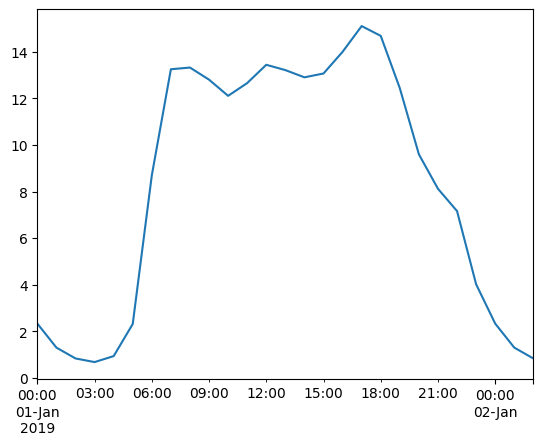

In [10]:
df['Av. Armando Duarte Rabelo'][3:30].plot()

<Axes: >

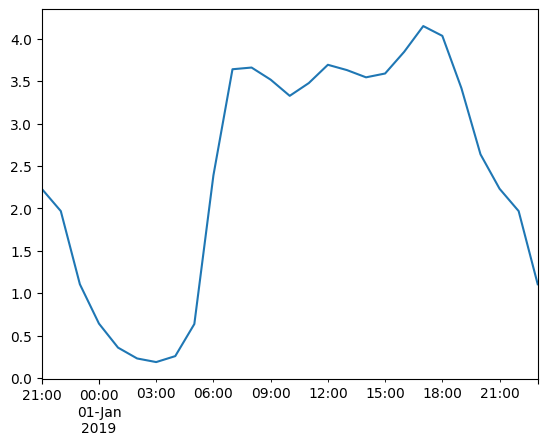

In [11]:
df['Vias Secundárias - Vitória'][:27].plot()

In [12]:
# Guardar los datos de cada columna en archivos de texto separados

for col in vias:
    filename = f'dados_of/{col}.txt'
    df_to_save = df[['tempo', col]]
    df_to_save.to_csv(filename, sep=',', index=False, header=False)
    print(f'Datos de la columna {col} guardados en el archivo {filename}')

Datos de la columna Rua Carlos Martins guardados en el archivo dados_of/Rua Carlos Martins.txt
Datos de la columna Av. José Celso Cláudio (1) guardados en el archivo dados_of/Av. José Celso Cláudio (1).txt
Datos de la columna Av. Norte Sul (2) guardados en el archivo dados_of/Av. Norte Sul (2).txt
Datos de la columna Vias Secundárias - Vitória guardados en el archivo dados_of/Vias Secundárias - Vitória.txt
Datos de la columna Av. José Celso Cláudio (2) guardados en el archivo dados_of/Av. José Celso Cláudio (2).txt
Datos de la columna Av. Italina Pereira Mota guardados en el archivo dados_of/Av. Italina Pereira Mota.txt
Datos de la columna Av. Dante Michelini (2) guardados en el archivo dados_of/Av. Dante Michelini (2).txt
Datos de la columna Av. José Rato guardados en el archivo dados_of/Av. José Rato.txt
Datos de la columna Rua Filogônio Mota guardados en el archivo dados_of/Rua Filogônio Mota.txt
Datos de la columna Av. Armando Duarte Rabelo guardados en el archivo dados_of/Av. Arma